### Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

In [1]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
##load the dataset
alphabet_df = pd.read_csv("Alphabets_data.csv")
alphabet_df.shape

(20000, 17)

In [3]:
alphabet_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
alphabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
#check for missing values
alphabet_df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
alphabet_df["letter"].nunique()

26

<Axes: xlabel='letter', ylabel='count'>

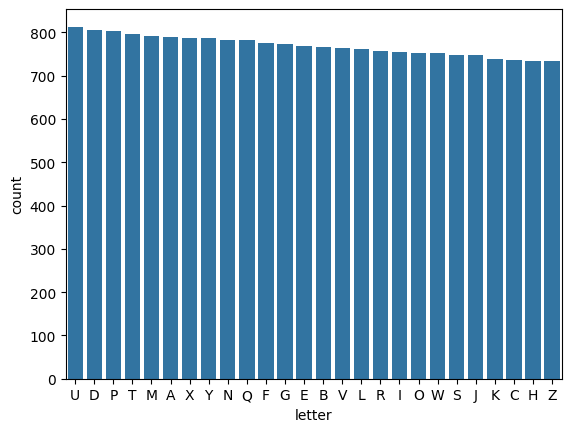

In [7]:
sns.barplot(alphabet_df["letter"].value_counts())

In [8]:
## check for duplicate rows
alphabet_df.duplicated().sum()

1332

In [9]:
alphabet_df = alphabet_df.drop_duplicates()
#check for duplicate values after dropping
alphabet_df.duplicated().sum()

0

In [10]:
##seperate input and target variable
x = alphabet_df.drop("letter",axis=1)
y = alphabet_df['letter']

In [11]:
## apply standardization on the numerical feature 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled.shape

(18668, 16)

In [13]:
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

In [14]:
x_scaled_df.head(2)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868


In [15]:
# One-hot encode the target variable
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

In [16]:
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=encoder.categories_[0])

In [17]:
y_encoded_df.head(2)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
len(y_encoded_df.columns)

26

In [19]:
##split dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y_encoded_df,test_size=0.2,random_state=12)

### Model Building

In [20]:
# Initialize the ANN model
model = Sequential()

In [21]:
# Add input and hidden layers
model.add(Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

In [22]:
# Add the output layer
model.add(Dense(units=len(y_encoded_df.columns), activation='softmax'))

In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
## Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
374/374 [==============================] - 2s 2ms/step - loss: 1.6789 - accuracy: 0.5385 - val_loss: 0.9529 - val_accuracy: 0.7211
Epoch 2/20
374/374 [==============================] - 1s 2ms/step - loss: 0.7551 - accuracy: 0.7773 - val_loss: 0.6816 - val_accuracy: 0.7944
Epoch 3/20
374/374 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.8319 - val_loss: 0.5655 - val_accuracy: 0.8226
Epoch 4/20
374/374 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.8628 - val_loss: 0.4810 - val_accuracy: 0.8500
Epoch 5/20
374/374 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8835 - val_loss: 0.4312 - val_accuracy: 0.8654
Epoch 6/20
374/374 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8986 - val_loss: 0.3913 - val_accuracy: 0.8838
Epoch 7/20
374/374 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.9124 - val_loss: 0.3471 - val_accuracy: 0.8909
Epoch 

In [25]:
#evaluate the model
loss, acuuracy = model.evaluate(x_test,y_test)
print("Test Accuracy:",acuuracy)

117/117 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9363
Test Accuracy: 0.9362613558769226
